# Import Libraries

In [1]:
# SVM Classification
import pandas as pd #data processing
import numpy as np # linear algebra
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
sal_data = pd.read_csv("SalaryData_Train(1).csv")

In [3]:
sal_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA

In [4]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
sal_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Let's see how many unique categories we have in this property
occupation_set = set(sal_data['occupation'])
print(occupation_set)

{' Prof-specialty', ' Tech-support', ' Adm-clerical', ' Priv-house-serv', ' Handlers-cleaners', ' Protective-serv', ' Exec-managerial', ' Armed-Forces', ' Other-service', ' Sales', ' Farming-fishing', ' Transport-moving', ' Craft-repair', ' Machine-op-inspct'}


In [7]:
# Now we classify them as numers instead of their names.
sal_data['occupation'] = sal_data['occupation'].map({ ' Other-service' : 0, ' Protective-serv' : 1,
                        ' Exec-managerial' : 2, ' Transport-moving' : 3, ' Tech-support' :4 , ' Handlers-cleaners' :5, 
                        ' Armed-Forces' : 6, ' Craft-repair' : 7, ' Sales' : 8, ' Farming-fishing' : 9, ' Adm-clerical' :10,
                        ' Priv-house-serv' : 11, ' Machine-op-inspct' :12, ' Prof-specialty' : 13}).astype(int)

In [8]:
sal_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,10,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,2,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,13,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,4,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,12,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,10,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,10,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
sal_data.iloc[:,-1] = labelencoder.fit_transform(sal_data.iloc[:,-1])

In [10]:
sal_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,10,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,2,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,13,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,4,Wife,White,Female,0,0,38,United-States,0
30157,40,Private,HS-grad,9,Married-civ-spouse,12,Husband,White,Male,0,0,40,United-States,1
30158,58,Private,HS-grad,9,Widowed,10,Unmarried,White,Female,0,0,40,United-States,0
30159,22,Private,HS-grad,9,Never-married,10,Own-child,White,Male,0,0,20,United-States,0


In [11]:
np.unique(sal_data.Salary)

array([0, 1])

# Visualization

In [12]:
# Importing matlab to plot graphs
import matplotlib as plt
%matplotlib inline

<AxesSubplot:xlabel='education'>

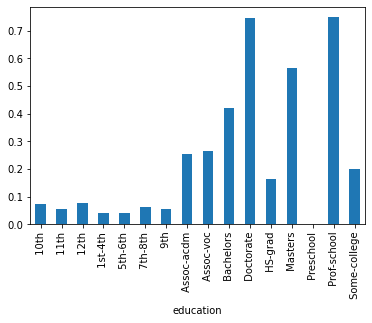

In [13]:
sal_data.groupby('education').Salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

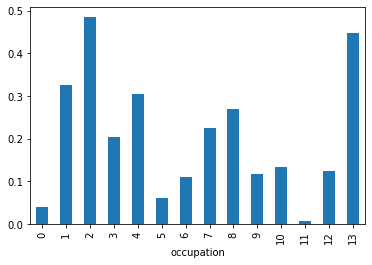

In [14]:
sal_data.groupby('occupation').Salary.mean().plot(kind='bar')

# Setting up a Support Vector Machine

In [15]:
from sklearn.model_selection import train_test_split

# Taking only the features that is important for now
X = sal_data[['educationno','age','hoursperweek']]

# Taking the labels (Salary)
Y = sal_data['Salary']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [16]:
X

,educationno,age,hoursperweek
0,13,39,40
1,13,50,13
2,9,38,40
3,7,53,40
4,13,28,40
...,...,...,...
30156,12,27,38
30157,9,40,40
30158,9,58,40
30159,9,22,20


In [17]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [18]:
np.unique(Y_train)

array([0, 1])

# Coding a Support Vector Machine

In [22]:
# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC

# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.7792143212332173


Finding more accurancy ny passing more feature values

In [23]:

# Taking only the features that is important for now
X = sal_data[['educationno', 'occupation','age','hoursperweek']]

# Taking the labels (Salary)
Y = sal_data['Salary']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [24]:
# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC

# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.7926404773744405
